<a href="https://colab.research.google.com/github/Urias-T/HDSC_Summer_2022/blob/main/Practical_Time_Series_Analysis_%26_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Triumph's Submission For Hamoye Internship Stage E Quiz

## Stage E: Practical Time Series Analysis & Forecast

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from math import sqrt
from sklearn.metrics import mean_squared_error
from prophet import Prophet
from prophet.plot import plot_yearly, plot_weekly
from statsmodels.tsa.stattools import adfuller

**Define a function that calculates the Mape using the definition of MAPE from the course Module and pass your dataset into it.**

In [2]:
def mean_absolute_percentage_error(y, yhat):
  return round((np.mean(np.abs((y - yhat) / y) * 100)), 2)

In [3]:
from google.colab import files

files.upload()

Saving Time_series_analysis_and_forecast_DATASET.csv to Time_series_analysis_and_forecast_DATASET (1).csv


{'Time_series_analysis_and_forecast_DATASET.csv': b'FullDate,Tmax,SysLoad,GasPrice,ElecPrice\n2010-09-01 00:00:00,15.8,1688.215,3.69,23.71\n2010-09-01 01:00:00,15.8,1669.1950000000004,3.69,22.635\n2010-09-01 02:00:00,15.8,1491.98,3.69,22.565\n2010-09-01 03:00:00,15.8,1330.76,3.69,18.91\n2010-09-01 04:00:00,15.8,1247.94,3.69,18.03\n2010-09-01 05:00:00,15.8,1232.0,3.69,19.16\n2010-09-01 06:00:00,15.8,1282.9299999999996,3.69,23.54\n2010-09-01 07:00:00,15.8,1430.935,3.69,26.235\n2010-09-01 08:00:00,15.8,1670.275,3.69,28.69\n2010-09-01 09:00:00,15.8,1815.155,3.69,29.630000000000006\n2010-09-01 10:00:00,15.8,1847.515,3.69,29.195\n2010-09-01 11:00:00,15.8,1833.075,3.69,28.49\n2010-09-01 12:00:00,15.8,1799.05,3.69,28.595\n2010-09-01 13:00:00,15.8,1819.12,3.69,29.59\n2010-09-01 14:00:00,15.8,1842.965,3.69,29.75\n2010-09-01 15:00:00,15.8,1868.735,3.69,30.67\n2010-09-01 16:00:00,15.8,1822.415,3.69,29.79\n2010-09-01 17:00:00,15.8,1870.23,3.69,31.8\n2010-09-01 18:00:00,15.8,2007.59,3.69,2142.995\n2

In [4]:
df_ori = pd.read_csv("/content/Time_series_analysis_and_forecast_DATASET.csv")
df_ori.head()

FullDate  Tmax   SysLoad  GasPrice  ElecPrice
0  2010-09-01 00:00:00  15.8  1688.215      3.69     23.710
1  2010-09-01 01:00:00  15.8  1669.195      3.69     22.635
2  2010-09-01 02:00:00  15.8  1491.980      3.69     22.565
3  2010-09-01 03:00:00  15.8  1330.760      3.69     18.910
4  2010-09-01 04:00:00  15.8  1247.940      3.69     18.030

# Data Visualization and Preparation

In [5]:
df1 = df_ori.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [6]:
df1["FullDate"] = pd.to_datetime(df1["FullDate"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


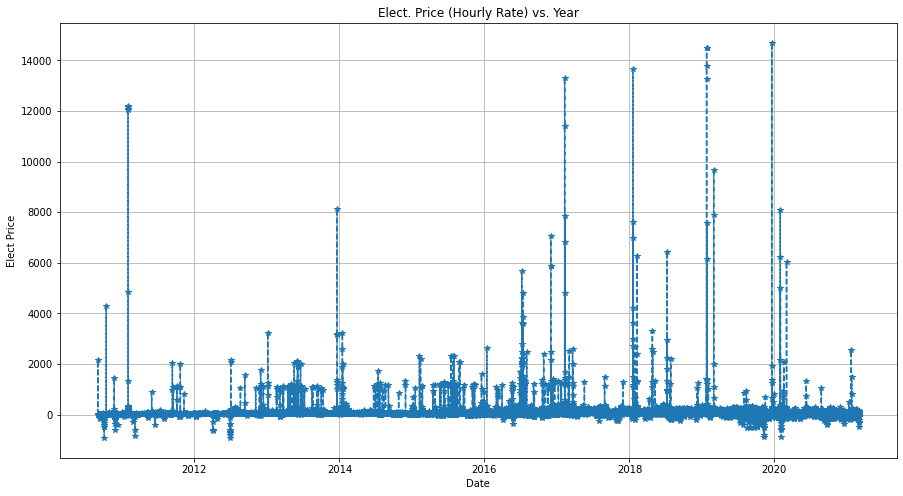

In [7]:
plt.figure(figsize = [15, 8])

plt.plot(df1["FullDate"], df1["ElecPrice"], "--", marker = "*")
plt.grid()
plt.xlabel("Date")
plt.ylabel("Elect Price")
plt.title("Elect. Price (Hourly Rate) vs. Year");

In [8]:
df1_daily = df1.resample("D", on = "FullDate").sum().reset_index()
df1_daily.head()

FullDate   Tmax    SysLoad  GasPrice  ElecPrice
0 2010-09-01  379.2  41565.380     88.56   2751.700
1 2010-09-02  369.6  38898.990     88.56    570.810
2 2010-09-03  439.2  41665.760    106.80    504.975
3 2010-09-04  328.8  35638.085     81.36    502.275
4 2010-09-05  357.6  35611.410    106.80    500.555

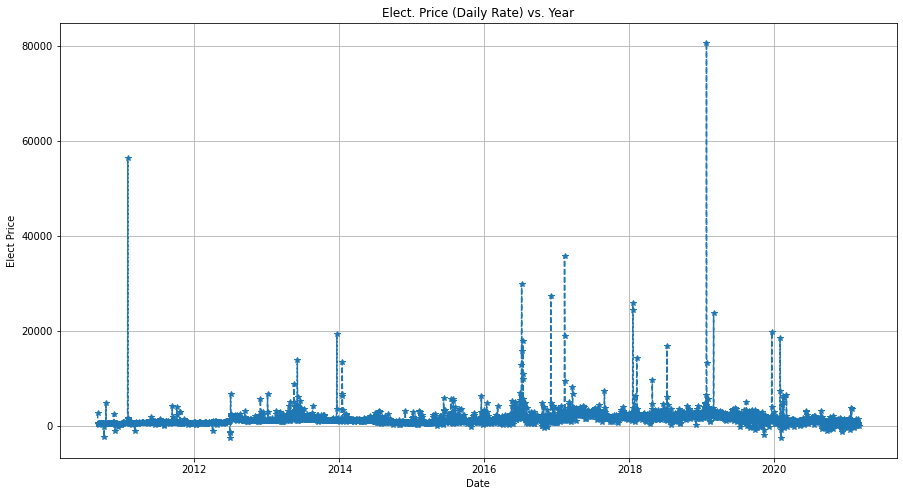

In [9]:
plt.figure(figsize = [15, 8])

plt.plot(df1_daily["FullDate"], df1_daily["ElecPrice"], "--", marker = "*")
plt.grid()
plt.xlabel("Date")
plt.ylabel("Elect Price")
plt.title("Elect. Price (Daily Rate) vs. Year");

In [10]:
df1_daily.rename(columns = {"FullDate" : "ds", "ElecPrice" : "y"}, inplace = True)
df1_daily.columns

Index(['ds', 'Tmax', 'SysLoad', 'GasPrice', 'y'], dtype='object')

**Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?**

In [11]:
SysLoad_adf_result = adfuller(df1_daily["SysLoad"])

print("SysLoad p-value: {}".format(SysLoad_adf_result[1].round(6)))

SysLoad p-value: 0.004254


In [12]:
GasPrice_adf_resdults = adfuller(df1_daily["GasPrice"])

print("GasPice p-value: {}", format(GasPrice_adf_resdults[1].round(6)))

GasPice p-value: {} 0.045027


**Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?**

In [13]:
ElecPrice_adf_results = adfuller(df1_daily["y"])

for k, v in ElecPrice_adf_results[4].items():
  v = v.round(4)
  print(f"{k} : {v}")

1% : -3.4321
5% : -2.8623
10% : -2.5672


In [14]:
cutoff = 2757

df1_daily_train = df1_daily.iloc[0 : cutoff, ]
df1_daily_test = df1_daily.iloc[cutoff : , ]

print(df1_daily_train.shape)
print(df1_daily_test.shape)

(2757, 5)
(1077, 5)


In [15]:
df1_daily_train.head()

ds   Tmax    SysLoad  GasPrice         y
0 2010-09-01  379.2  41565.380     88.56  2751.700
1 2010-09-02  369.6  38898.990     88.56   570.810
2 2010-09-03  439.2  41665.760    106.80   504.975
3 2010-09-04  328.8  35638.085     81.36   502.275
4 2010-09-05  357.6  35611.410    106.80   500.555

# Univariate Model

In [16]:
uni_traindf = df1_daily_train[["ds", "y"]].copy()
uni_traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2757 entries, 0 to 2756
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2757 non-null   datetime64[ns]
 1   y       2757 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 43.2 KB


In [17]:
uni_testdf = df1_daily_test[["ds", "y"]].copy()
uni_testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 2757 to 3833
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1077 non-null   datetime64[ns]
 1   y       1077 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.0 KB


In [18]:
uni_model = Prophet()

uni_model.fit(uni_traindf)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvf6poitn/iy7_jt4d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvf6poitn/mt5rodyu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10638', 'data', 'file=/tmp/tmpvf6poitn/iy7_jt4d.json', 'init=/tmp/tmpvf6poitn/mt5rodyu.json', 'output', 'file=/tmp/tmp1_0qtyfn/prophet_model-20221004125047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:50:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:50:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [19]:
uni_predict = uni_testdf[["ds"]].copy()
uni_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 2757 to 3833
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1077 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.5 KB


In [20]:
uni_predict.head()

ds
2757 2018-03-20
2758 2018-03-21
2759 2018-03-22
2760 2018-03-23
2761 2018-03-24

In [21]:
uni_forecast = uni_model.predict(uni_predict)
uni_forecast[["ds", "yhat", "yhat_lower", "yhat_upper", "trend", "trend_lower", "trend_upper"]]

ds         yhat  yhat_lower   yhat_upper        trend  \
0    2018-03-20  2521.998098   92.220824  4905.577572  2676.996143   
1    2018-03-21  2675.181324  281.334701  5148.766281  2677.763256   
2    2018-03-22  2774.036399  451.458237  5068.717184  2678.530368   
3    2018-03-23  2566.035844  128.377110  4780.274334  2679.297480   
4    2018-03-24  2241.126584  -90.687226  4554.588023  2680.064592   
...         ...          ...         ...          ...          ...   
1072 2021-02-24  3410.743291  504.224164  6077.704194  3499.340422   
1073 2021-02-25  3477.583734  679.109537  6431.995192  3500.107534   
1074 2021-02-26  3244.380463  181.343280  6262.292278  3500.874646   
1075 2021-02-27  2901.031053   30.921354  5804.437091  3501.641758   
1076 2021-02-28  2812.950097 -164.105967  5582.683205  3502.408871   

      trend_lower  trend_upper  
0     2676.996143  2676.996143  
1     2677.763256  2677.763256  
2     2678.530368  2678.530368  
3     2679.297480  2679.297480  
4     2680.064592  2680.064592  
...           ...          ...  
1072  1922.229986  5022.822753  
1073  1919.164432  5024.940549  
1074  1916.098879  5027.058345  
1075  1913.033325  5029.203602  
1076  1910.627375  5031.399303  

[1077 rows x 7 columns]

In [22]:
uni_forecastdf = uni_forecast[["ds", "yhat"]]
uni_forecastdf.head()

ds         yhat
0 2018-03-20  2521.998098
1 2018-03-21  2675.181324
2 2018-03-22  2774.036399
3 2018-03-23  2566.035844
4 2018-03-24  2241.126584

In [23]:
uni_testdf.head()

ds        y
2757 2018-03-20  1833.00
2758 2018-03-21  1730.49
2759 2018-03-22  2260.55
2760 2018-03-23  2138.76
2761 2018-03-24  1721.70

In [24]:
uni_final = pd.merge(uni_testdf, uni_forecastdf, on = "ds")
uni_final.head()

ds        y         yhat
0 2018-03-20  1833.00  2521.998098
1 2018-03-21  1730.49  2675.181324
2 2018-03-22  2260.55  2774.036399
3 2018-03-23  2138.76  2566.035844
4 2018-03-24  1721.70  2241.126584

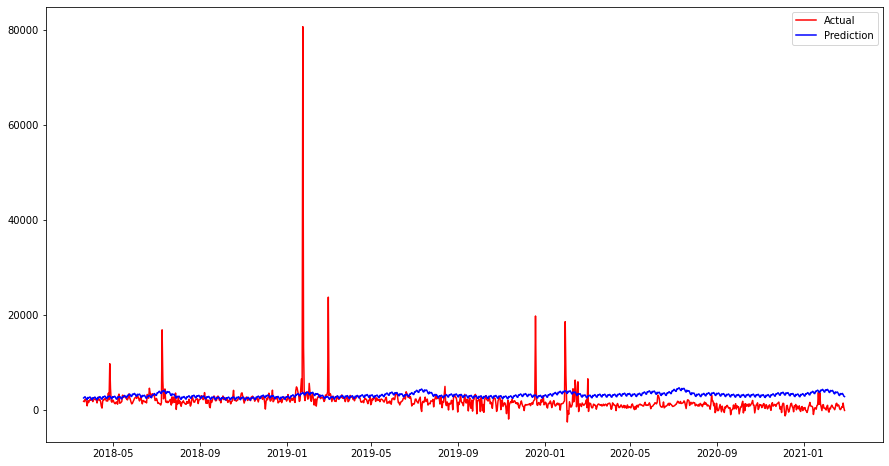

In [25]:
plt.figure(figsize = [15, 8])

plt.plot(uni_final["ds"], uni_final["y"], label = "Actual", color = "red")
plt.plot(uni_final["ds"], uni_final["yhat"], label = "Prediction", color = "blue")
plt.legend();

**Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?**

In [26]:
uni_MAPE = mean_absolute_percentage_error(uni_final["y"], uni_final["yhat"])
uni_MAPE

539.22

**What is the RMSE in 2 decimal places?**

In [27]:
uni_rms = sqrt(mean_squared_error(uni_final["y"], uni_final["yhat"]))
uni_rms = round(uni_rms, 2)
print(uni_rms)

3196.64


**If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?**

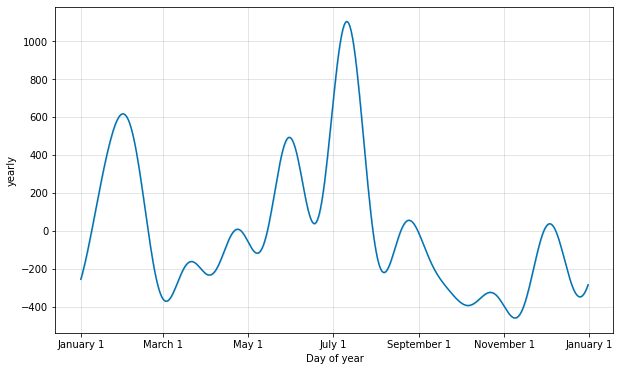

In [28]:
plot_yearly(uni_model)

# Multivariate Models

In [29]:
multi_model = Prophet()
multi_model.add_regressor("SysLoad")
multi_model.add_regressor("Tmax")
multi_model.add_regressor("GasPrice")
multi_model.fit(df1_daily_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvf6poitn/osybersl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvf6poitn/tyf_zhou.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94108', 'data', 'file=/tmp/tmpvf6poitn/osybersl.json', 'init=/tmp/tmpvf6poitn/tyf_zhou.json', 'output', 'file=/tmp/tmpwhniyde8/prophet_model-20221004125053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:50:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:50:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [30]:
multi_predict = df1_daily_test[['ds', "SysLoad", "Tmax","GasPrice"]].copy()
multi_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 2757 to 3833
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ds        1077 non-null   datetime64[ns]
 1   SysLoad   1077 non-null   float64       
 2   Tmax      1077 non-null   float64       
 3   GasPrice  1077 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 33.8 KB


In [31]:
multi_predict.head()

ds      SysLoad   Tmax  GasPrice
2757 2018-03-20   7696.91130  540.0  201.5880
2758 2018-03-21   4658.05865  571.2  203.2560
2759 2018-03-22  19161.78525  722.4  203.2560
2760 2018-03-23  18090.43435  811.2  198.6456
2761 2018-03-24   3763.53865  832.8  180.2160

In [32]:
multi_forecast = multi_model.predict(multi_predict)
multi_forecast[["ds", "yhat", "yhat_lower", "yhat_upper", "trend", "trend_lower", "trend_upper"]]

ds         yhat   yhat_lower   yhat_upper        trend  \
0    2018-03-20  1988.494818  -178.709926  4301.570570  1867.223392   
1    2018-03-21  1980.063539  -314.540428  4329.627296  1867.913438   
2    2018-03-22  2899.369177   582.104886  5174.934861  1868.603483   
3    2018-03-23  2583.628888   227.124787  4812.079248  1869.293529   
4    2018-03-24  1437.347502  -692.318947  3570.941381  1869.983574   
...         ...          ...          ...          ...          ...   
1072 2021-02-24   961.208123 -1242.195436  3315.356213  2606.952122   
1073 2021-02-25  1320.421177 -1020.107104  3811.195220  2607.642167   
1074 2021-02-26  1383.914142  -852.946128  3747.651485  2608.332213   
1075 2021-02-27  1038.834888 -1390.226094  3236.267573  2609.022258   
1076 2021-02-28  1199.045661 -1147.861458  3550.022053  2609.712304   

      trend_lower  trend_upper  
0     1867.223392  1867.223392  
1     1867.913438  1867.913438  
2     1868.603483  1868.603483  
3     1869.293529  1869.293529  
4     1869.983574  1869.983574  
...           ...          ...  
1072  1857.771112  3428.289307  
1073  1857.908448  3430.256865  
1074  1858.068485  3432.224424  
1075  1858.273417  3434.191982  
1076  1858.226873  3436.159541  

[1077 rows x 7 columns]

In [33]:
multi_forecastdf = multi_forecast[["ds", "yhat"]]
multi_forecastdf.head()

ds         yhat
0 2018-03-20  1988.494818
1 2018-03-21  1980.063539
2 2018-03-22  2899.369177
3 2018-03-23  2583.628888
4 2018-03-24  1437.347502

In [34]:
df1_daily_testdf = df1_daily_test[["ds", "y"]]
df1_daily_testdf.head()

ds        y
2757 2018-03-20  1833.00
2758 2018-03-21  1730.49
2759 2018-03-22  2260.55
2760 2018-03-23  2138.76
2761 2018-03-24  1721.70

In [35]:
multi_final = pd.merge(multi_forecastdf, df1_daily_testdf, on = "ds")
multi_final.head()

ds         yhat        y
0 2018-03-20  1988.494818  1833.00
1 2018-03-21  1980.063539  1730.49
2 2018-03-22  2899.369177  2260.55
3 2018-03-23  2583.628888  2138.76
4 2018-03-24  1437.347502  1721.70

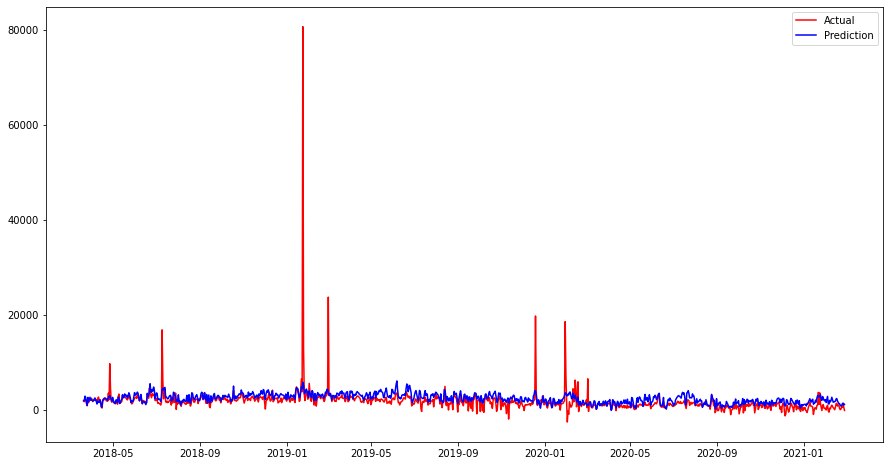

In [36]:
plt.figure(figsize = [15, 8])

plt.plot(multi_final["ds"], multi_final["y"], label = "Actual", color = "red")
plt.plot(multi_final["ds"], multi_final["yhat"], label = "Prediction", color = "blue")
plt.legend();

**Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?**

In [37]:
multi_MAPE = mean_absolute_percentage_error(multi_final["y"], multi_final["yhat"])
multi_MAPE

232.43

**What is the RMSE in 2 decimal places?**

In [38]:
multi_rms = sqrt(mean_squared_error(multi_final["y"], multi_final["yhat"]))
multi_rms = round(multi_rms, 2)
print(multi_rms)

2708.17


**If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?**

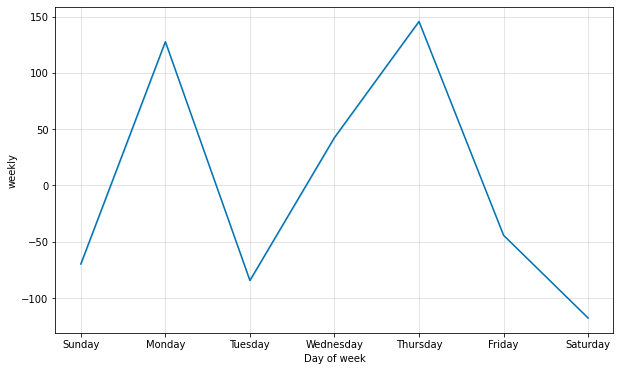

In [39]:
plot_weekly(multi_model)

**Train a multivariate time series model performing the same train test split as before, but now exclude T-max from the training data(drop T-max),**

In [40]:
multi_model2 = Prophet()
multi_model2.add_regressor("SysLoad")
multi_model2.add_regressor("GasPrice")
multi_model2.fit(df1_daily_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvf6poitn/cfdnhmcz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvf6poitn/1qsky68t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97728', 'data', 'file=/tmp/tmpvf6poitn/cfdnhmcz.json', 'init=/tmp/tmpvf6poitn/1qsky68t.json', 'output', 'file=/tmp/tmp2_a9jp_v/prophet_model-20221004125057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:50:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:50:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [41]:
multi_predict2 = df1_daily_test[['ds', "SysLoad","GasPrice"]].copy()
multi_predict2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 2757 to 3833
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ds        1077 non-null   datetime64[ns]
 1   SysLoad   1077 non-null   float64       
 2   GasPrice  1077 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 25.4 KB


In [42]:
multi_predict2.head()

ds      SysLoad  GasPrice
2757 2018-03-20   7696.91130  201.5880
2758 2018-03-21   4658.05865  203.2560
2759 2018-03-22  19161.78525  203.2560
2760 2018-03-23  18090.43435  198.6456
2761 2018-03-24   3763.53865  180.2160

In [43]:
multi_forecast2 = multi_model2.predict(multi_predict2)
multi_forecast2[["ds", "yhat", "yhat_lower", "yhat_upper", "trend", "trend_lower", "trend_upper"]]

ds         yhat   yhat_lower   yhat_upper        trend  \
0    2018-03-20  1988.154678  -279.209202  4098.239486  1867.830813   
1    2018-03-21  1979.613884  -145.979768  4241.937420  1868.521551   
2    2018-03-22  2899.301882   854.074324  5113.196673  1869.212289   
3    2018-03-23  2584.013509   525.624302  4972.562733  1869.903028   
4    2018-03-24  1436.700243  -845.749955  3602.192668  1870.593766   
...         ...          ...          ...          ...          ...   
1072 2021-02-24   959.967485 -1660.271642  3208.302289  2608.302297   
1073 2021-02-25  1319.116986  -981.977752  3626.538845  2608.993035   
1074 2021-02-26  1383.548481 -1045.266131  3705.178377  2609.683774   
1075 2021-02-27  1038.155719 -1217.906525  3543.237681  2610.374512   
1076 2021-02-28  1199.344702 -1261.085493  3505.773263  2611.065250   

      trend_lower  trend_upper  
0     1867.830813  1867.830813  
1     1868.521551  1868.521551  
2     1869.212289  1869.212289  
3     1869.903028  1869.903028  
4     1870.593766  1870.593766  
...           ...          ...  
1072  1885.605255  3383.307011  
1073  1885.540217  3385.227444  
1074  1885.490695  3386.378762  
1075  1885.441173  3387.530080  
1076  1885.391651  3388.692193  

[1077 rows x 7 columns]

In [44]:
multi_forecast2df = multi_forecast2[["ds", "yhat"]]
multi_forecast2df.head()

ds         yhat
0 2018-03-20  1988.154678
1 2018-03-21  1979.613884
2 2018-03-22  2899.301882
3 2018-03-23  2584.013509
4 2018-03-24  1436.700243

In [45]:
multi_final2 = pd.merge(multi_forecast2df, df1_daily_testdf, on = "ds")
multi_final2.head()

ds         yhat        y
0 2018-03-20  1988.154678  1833.00
1 2018-03-21  1979.613884  1730.49
2 2018-03-22  2899.301882  2260.55
3 2018-03-23  2584.013509  2138.76
4 2018-03-24  1436.700243  1721.70

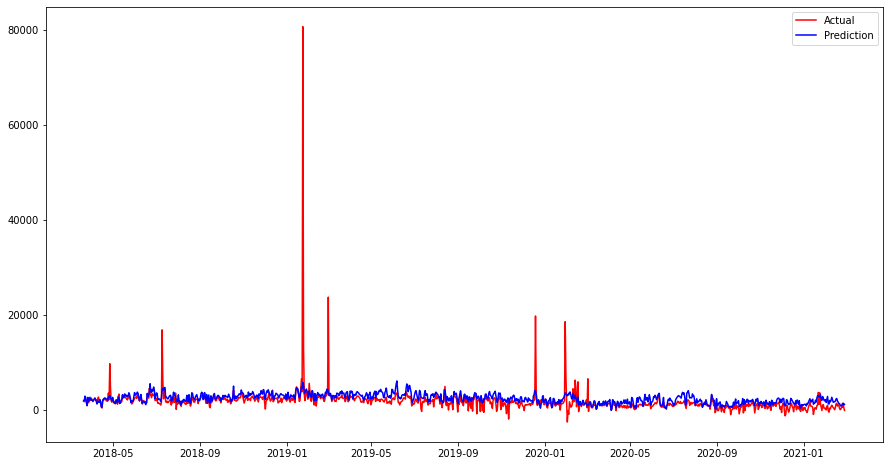

In [46]:
plt.figure(figsize = [15, 8])

plt.plot(multi_final2["ds"], multi_final2["y"], label = "Actual", color = "red")
plt.plot(multi_final2["ds"], multi_final2["yhat"], label = "Prediction", color = "blue")
plt.legend();

**What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?**

In [47]:
multi2_MAPE = mean_absolute_percentage_error(multi_final2["y"], multi_final2["yhat"])
multi2_MAPE

232.38